In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df['Exited'].value_counts() #Imbalanced dataset (0- Still customer , 1- no longer a customer )

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
# Drop first three columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [15]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [16]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
X_test

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# We are sequential model
model = Sequential()

In [20]:
# Let us say we have 3 layer. Input layer , Hidden Layer , Output Layer
# Hidden laye has 3 perceptron (Say)
model.add(Dense(3,activation='sigmoid',input_dim=11)) # It says 3 perceptrons are there in hidden layer , we are using sigmoid as activation function and tottal input are 11
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [23]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.5417
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5060
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4841
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4689
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4580
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4499
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4439
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4393
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4359
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4333


In [24]:
model.layers[0].get_weights()

[array([[ 0.3198582 ,  0.15017225, -0.12217849],
        [-1.0213064 , -1.6552955 , -0.8725417 ],
        [-0.31311026,  0.08433886,  0.2755116 ],
        [-0.19237289, -0.06203719, -0.5704091 ],
        [-0.26600787, -0.02388543,  0.5767271 ],
        [ 0.11111699,  0.437301  , -0.32505816],
        [ 0.4743238 ,  0.9195367 ,  0.53469557],
        [-0.2739962 ,  0.01145626,  0.05141781],
        [-0.7949978 , -0.7395866 , -0.12040707],
        [ 0.38374835, -0.0986772 , -0.3017183 ],
        [ 0.26559192,  0.1819081 ,  0.7683003 ]], dtype=float32),
 array([0.16388121, 0.25070179, 0.08629444], dtype=float32)]

In [25]:
model.layers[1].get_weights()  #array([-0.415944 ,  0.4626594,  0.5828137] these are bias

[array([[-0.85986656],
        [-1.0773747 ],
        [-1.1665092 ]], dtype=float32),
 array([0.04708656], dtype=float32)]

In [26]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [27]:
y_pred

array([[0.10398275],
       [0.1444175 ],
       [0.13369519],
       ...,
       [0.06476978],
       [0.14730842],
       [0.35934114]], dtype=float32)

In [28]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

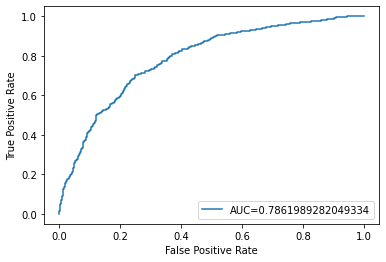

In [29]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
# Above we have plotted ROC-AUC curve. the aur score is 0.78 as it is close to 1, the model is performing better

In [31]:
# We will perform below things if we are using activation function as sigmoid.
# Here in the output the prediction (y_pred) is not 0 or 1 as we are using sigmoid function. Sigmoid funtion gives output between 0 to 1.
# We have to convert the prediction to 0 and 1.
# To convert we have to define a threshold value below which it is consider as 0 else 1
# Threshold value is calculated from roc auc curve https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
# Here we are taking threshold as 0.5
y_pred=np.where(y_pred>0.5,1,0) #If y_pred >0.5 then 1 else 0

In [32]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.795

In [34]:
# Trying different way to form neural network
model_1=Sequential()
model_1.add(Dense(11,activation='relu',input_dim=11)) # Layer 1 (hidden layer) has 11 perceptrons
model_1.add(Dense(11,activation='relu')) # Layer 2 (hidden layer) has 11 perceptron 
model_1.add(Dense(1,activation='sigmoid')) # layer 3 (output layer) has 1 perceptron
# ReLU function is its derivative both are monotonic.
# The function returns 0 if it receives any negative input, but for any positive value x, it returns that value back.
# Thus it gives an output that has a range from 0 to infinity.

In [35]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [37]:
history=model_1.fit(X_train,y_train,epochs=50,validation_split=0.2) 
# Validation split - While fitting the model 20% of data from X_train will be for validating

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.5269 - accuracy: 0.7692 - val_loss: 0.4645 - val_accuracy: 0.8012
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4457 - accuracy: 0.8075 - val_loss: 0.4355 - val_accuracy: 0.8138
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.8170 - val_loss: 0.4182 - val_accuracy: 0.8194
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8289 - val_loss: 0.4022 - val_accuracy: 0.8256
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8345 - val_loss: 0.3893 - val_accuracy: 0.8375
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8422 - val_loss: 0.3766 - val_accuracy: 0.8431
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3733 - accuracy: 0.8495 - val_loss: 0.3666 - val_accuracy: 0.8481
Epoch 

In [38]:
y_pred_1=model_1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [39]:
y_pred_1

array([[0.02497755],
       [0.09487001],
       [0.05328216],
       ...,
       [0.00939713],
       [0.01993925],
       [0.33857727]], dtype=float32)

In [40]:
y_pred_1=np.where(y_pred_1>0.5,1,0)

In [41]:
accuracy_score(y_test,y_pred_1)

0.8665

In [42]:
history.history

{'loss': [0.5269199013710022,
  0.44573917984962463,
  0.4245963394641876,
  0.4096599221229553,
  0.39673763513565063,
  0.3847401440143585,
  0.37327197194099426,
  0.3651250898838043,
  0.35870420932769775,
  0.3540734350681305,
  0.35092535614967346,
  0.3484083116054535,
  0.3465259075164795,
  0.3457353115081787,
  0.34386005997657776,
  0.34360793232917786,
  0.34219303727149963,
  0.3415732979774475,
  0.3406798839569092,
  0.33943384885787964,
  0.3388316035270691,
  0.33861178159713745,
  0.3375910222530365,
  0.33684659004211426,
  0.33648690581321716,
  0.3352210223674774,
  0.3349117934703827,
  0.33401384949684143,
  0.33412590622901917,
  0.33368605375289917,
  0.33331379294395447,
  0.3328078091144562,
  0.3324929475784302,
  0.33230191469192505,
  0.331705778837204,
  0.33146199584007263,
  0.33128121495246887,
  0.33044615387916565,
  0.3305913507938385,
  0.3307030200958252,
  0.3301422894001007,
  0.3296457529067993,
  0.33005037903785706,
  0.32910043001174927,
  0

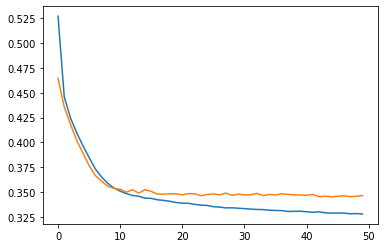

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #Over fitting

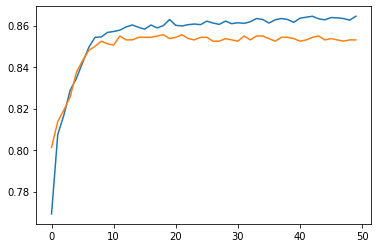

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])